<a href="https://colab.research.google.com/github/clwilkinson7/Temp/blob/main/CSY208223827534_Callum_Wilkinson_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving Facial Recognition Dataset.zip to Facial Recognition Dataset.zip


In [ ]:
try:
  !rm -rf Facial\ Recognition\ Dataset
except:
  pass

!unzip -q Facial\ Recognition\ Dataset.zip

In [ ]:
import os
import cv2


imagePaths = []
imageLabels = []
dataset = "Facial Recognition Dataset"


for label in os.listdir(dataset):
  labelPath = os.path.join(dataset, label)
  for image in os.listdir(labelPath):
    imagePath = os.path.join(labelPath, image)
    if image.endswith(".JPG"):
      newImagePath = imagePath[:-4] + ".jpg"
      os.rename(imagePath, newImagePath)
      imagePath = newImagePath

    imagePaths.append(imagePath)
    imageLabels.append(label)

In [ ]:
from sklearn.model_selection import train_test_split

trainDataset, tempDataset, trainLabels, tempLabels = train_test_split(imagePaths, imageLabels, test_size=0.3, random_state=42, stratify=imageLabels)
validationDataset, testDataset, validationLabels, testLabels = train_test_split(tempDataset, tempLabels, test_size=0.5, random_state=42, stratify=tempLabels)

In [ ]:
try:
  !rm -rf Dataset
except:
  pass

!mkdir -p Dataset/Train/PersonA Dataset/Train/PersonB Dataset/Train/PersonC
!mkdir -p Dataset/Validation/PersonA Dataset/Validation/PersonB Dataset/Validation/PersonC
!mkdir -p Dataset/Test/PersonA Dataset/Test/PersonB Dataset/Test/PersonC

In [ ]:
import shutil
from pathlib import Path

trainDir = Path("Dataset/Train/")
validationDir = Path("Dataset/Validation/")
testDir = Path("Dataset/Test/")

trainDirs = [str(dir) for dir in trainDir.iterdir()]
validationDirs = [str(dir) for dir in validationDir.iterdir()]
testDirs = [str(dir) for dir in testDir.iterdir()]


def ImageCopy(dataset, datasetDirs):
  for path in dataset:
    if os.path.isfile(path):
      label = os.path.basename(os.path.dirname(path))
      for dir in datasetDirs:
        if label == os.path.basename(dir):
          shutil.copy(path, dir)

ImageCopy(trainDataset, trainDirs)
ImageCopy(validationDataset, validationDirs)
ImageCopy(testDataset, testDirs)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

imageSize = (224, 224)
batchSize = 8

trainDatasetBatched = image_dataset_from_directory(
    trainDir,
    image_size = imageSize,
    batch_size = batchSize,
)

validationDatasetBatched = image_dataset_from_directory(
    validationDir,
    image_size = imageSize,
    batch_size = batchSize,
)

testDatasetBatched = image_dataset_from_directory(
    testDir,
    image_size = imageSize,
    batch_size = batchSize,
)

Found 168 files belonging to 3 classes.
Found 36 files belonging to 3 classes.
Found 36 files belonging to 3 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

dataAugmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomTranslation(0.1, 0.1),
        layers.RandomContrast(0.3),
        layers.RandomBrightness(0.2),
    ]
)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import BatchNormalization

inputs = layers.Input(shape=(224, 224, 3))
x = dataAugmentation(inputs)
x = layers.Rescaling(1.0 / 255)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(3, activation='softmax')(x)

model = Model(inputs, outputs)

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,246,467 (84.86 MB)

 Trainable params: 22,245,955 (84.86 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
try:
  !rm -rf MyModel.keras
except:
  pass

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath = "MyModel.keras",
    save_best_only = True,
    monitor = "val_loss",
    )
]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classWeights = compute_class_weight('balanced', classes=np.unique(trainLabels), y = trainLabels)
classWeightDict = {i: classWeights[i] for i in range(len(classWeights))}

In [ ]:
history = model.fit(
    trainDatasetBatched,
    epochs = 20,
    validation_data = validationDatasetBatched,
    callbacks = callbacks,
    class_weight = classWeightDict
)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4836 - loss: 1.2636 - val_accuracy: 0.5278 - val_loss: 0.9731
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5994 - loss: 1.0104 - val_accuracy: 0.4167 - val_loss: 0.9928
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5684 - loss: 0.9508 - val_accuracy: 0.8056 - val_loss: 0.8661
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5870 - loss: 1.0466 - val_accuracy: 0.6389 - val_loss: 0.8821
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6927 - loss: 0.7460 - val_accuracy: 0.6389 - val_loss: 0.8873
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6741 - loss: 0.7849 - val_accuracy: 0.5000 - val_loss: 0.8943
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7474 - loss: 0.7447 - val_accuracy: 0.6667 - val_loss: 0.9053
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7019 - loss: 0.6378 - val_accuracy: 0.6111 - val_loss:

In [ ]:
test_model = keras.models.load_model("MyModel.keras")
test_loss, test_acc = test_model.evaluate(testDatasetBatched)
print(f"Test accuracy: {test_acc:.3f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step - accuracy: 0.9363 - loss: 0.2755
Test accuracy: 0.944


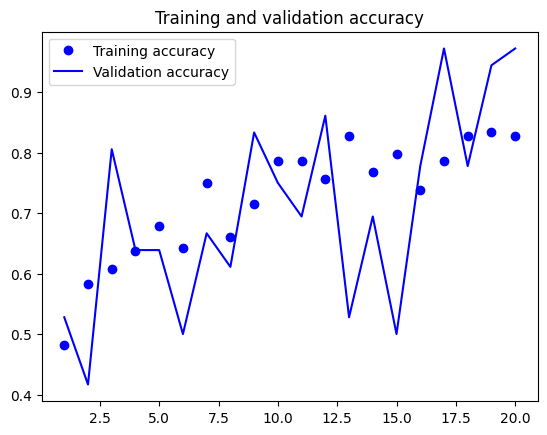

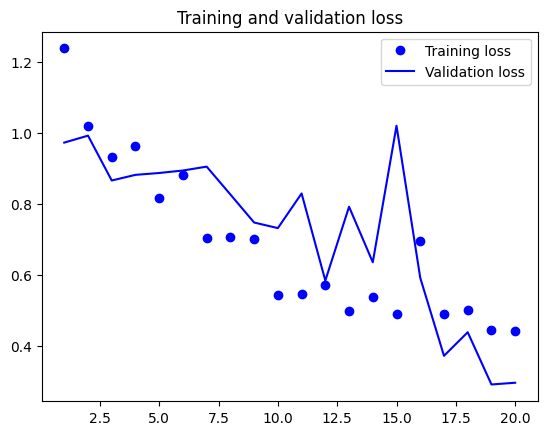

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
validationAccuracy = history.history["val_accuracy"]
loss = history.history["loss"]
validationLoss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label = "Training accuracy")
plt.plot(epochs, validationAccuracy, "b", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, validationLoss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

predictions = test_model.predict(testDatasetBatched)
predictedLabels = np.argmax(predictions, axis = -1)
trueLabels = np.concatenate([y.numpy() for x, y in testDatasetBatched], axis = 0)

print(classification_report(trueLabels, predictedLabels, digits = 4))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step
              precision    recall  f1-score   support

           0     0.4615    0.5000    0.4800        12
           1     0.3636    0.3333    0.3478        12
           2     0.4167    0.4167    0.4167        12

    accuracy                         0.4167        36
   macro avg     0.4139    0.4167    0.4148        36
weighted avg     0.4139    0.4167    0.4148        36

